# ROMS freezing point calculation

In [1]:
# get environment variables
import os
import sys
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

sys.path.append(os.environ.get('srcdir'))

In [21]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as ocm

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [8]:
his_path = os.path.join(os.environ.get("rawdir"),'waom10_v2.0_small','ocean_avg_spinUp_0010.nc')
his_b = xr.open_dataset(his_path).isel(s_rho=-1).mean('ocean_time')

grd_path = os.path.join(os.environ.get("prodir"),'waom10_small_grd.nc')
grd = xr.open_dataset(grd_path)

In [12]:
a = -0.057
b = 0.0939
c = 7.61e-4

Tf = his_b.salt * a + b + c*grd.zice.values

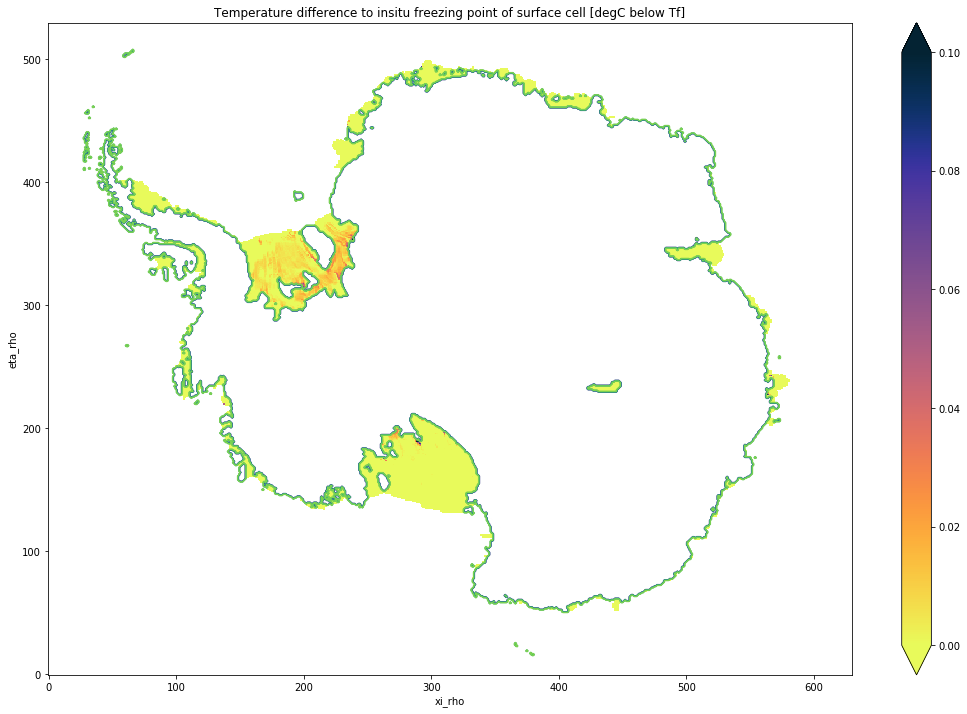

In [37]:
plt.close()
(Tf-his_b.temp).where(grd.zice<0).plot(vmin=0,vmax=0.1,size=12,cmap=ocm.thermal_r)
grd.mask_rho.plot.contour()
plt.title('Temperature difference to insitu freezing point of surface cell [degC below Tf]')
plt.show()